In [74]:
#Bibliotecas:
import numpy as np
import pandas as pd
from qutip import *
import csv 
import latex
import time

import matplotlib.pyplot as plt 
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": "18",
    "font.serif": ["Times New Roman"]})
import matplotlib
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13)
matplotlib.rc('legend', fontsize=13) 
import matplotlib.gridspec as gridspec
from palettable.colorbrewer.qualitative import Set1_5

In [75]:
#Parâmetros:

Nat=1    #caso para 1 átomo    
kappa = 1.0    #taxa de dissipação da cavidade
g = 10.0*kappa/np.sqrt(Nat)    #força de interação/constante de acoplamento
epsilon = np.sqrt(0.1)*kappa        #1 fóton na cavidade com 1.0*kappa
Delta1 = 0.0*kappa           
Delta2 = 0.0*kappa         #ressonante (delta2 = 0)
DeltaP = 0.0*kappa
omegac_list = [0.01*kappa , 0.1*kappa, 0.5*kappa, 1*kappa, 2*kappa]        #frequência de Rabi do campo de controle

       
gamma = 1.0       #taxa de dissipação do átomo (espontâneo)
gamma_13 = 0.5*gamma
gamma_23 = 0.5*gamma

N = 6   #número de estados Focks na cavidade (truncamento)

tlist = np.linspace(0,5100,501)*kappa

In [76]:
#Estados ( |k> = (N,k-1) , N úmero total de estados):

state1 = basis(3,0)
state2 = basis(3,1)
state3 = basis(3,2) 

#Operadores (S representa o sigma - sigma_nm = |n><m| - simgma_nm=tensor(qeye(N),staten*statem.dag())):

S11 = tensor(qeye(N),state1*state1.dag())
S22 = tensor(qeye(N),state2*state2.dag()) 
S31 = tensor(qeye(N),state3*state1.dag())
S13 = tensor(qeye(N),state1*state3.dag())
S32 = tensor(qeye(N),state3*state2.dag())
S23 = tensor(qeye(N),state2*state3.dag())
S33 = tensor(qeye(N),state3*state3.dag())

a = tensor(destroy(N),qeye(3))  #operador de aniquilação dos fótons (destrói uma estação do campo)


#Operadores de colapso:

c_ops_cav = np.sqrt(kappa)*a 

c_ops_atom_13 = np.sqrt(gamma_13)*S13

c_ops_atom_23 = np.sqrt(gamma_23)*S23

#Dissipação:

c_ops_list = [c_ops_cav, c_ops_atom_13, c_ops_atom_23]


In [78]:
trans_ss_list = []

for i in range(len(omegac_list)):
    
    omegac = omegac_list[i]
    print(omegac)
    
    
    #Hamiltoniano: 

    H = Delta1*S33 + (Delta1-Delta2)*S22 + DeltaP*S11 - DeltaP*a.dag()*a + (g*a*S31 + omegac*S32 + epsilon*a + g*a.dag()*S13 + omegac*S23 + epsilon*a.dag())


    #Evolução temporal: equação mestra

    psi0 = tensor(basis(N,0), state2)
    output = mcsolve(H,psi0,tlist,c_ops_list,[a.dag()*a],ntraj=1)
    trans_ss = output.expect[0]/(4*(epsilon/kappa)**2)
#     sig11_ss_list = output.expect[1]
#     sig22_ss_list = output.expect[2]
#     sig33_ss_list = output.expect[3]

    #Evolução temporal: Propagador
    
    #psi0 = tensor(basis(N,0),state2)
    #dim = N*3
    #rho0_m = ket2dm(psi0).full()
    #rho0_vec = rho0_m.reshape((dim**2,1))
    
    trans_ss_list.append(trans_ss)
    
    #for t in tlist:
        
    #    L = liouvillian(H,c_ops_list)
    #    Ut = lin.expm(t*L.full())
    #    rhot_vec = np.dot(Ut,rho0_vec)
    #    rhot_m = rhot_vec.reshape((dim,dim))
    #    trans_ss_list.append(np.trace(np.dot((a.dag()*a).full(),rhot_m))/(2*(epsilon/kappa)**2))
    
    data = np.vstack((tlist,trans_ss_list))
    file_data_store('timeevolution_g10_ep01.csv',  data.T, numtype="real", numformat="decimal", sep= ",")  

0.01
Total run time:   3.72s
0.1
Total run time:   4.98s
0.5
Total run time:   5.93s
1.0
Total run time:   5.92s
2.0
Total run time:   6.78s


In [79]:
N1 = np.loadtxt('timeevolution_g5_ep01.csv', delimiter=',')
N2 = np.loadtxt('timeevolution_g1_ep01.csv', delimiter=',')
N3 = np.loadtxt('timeevolution_g01_ep01.csv', delimiter=',')
N4 = np.loadtxt('timeevolution_g10_ep01.csv', delimiter=',')

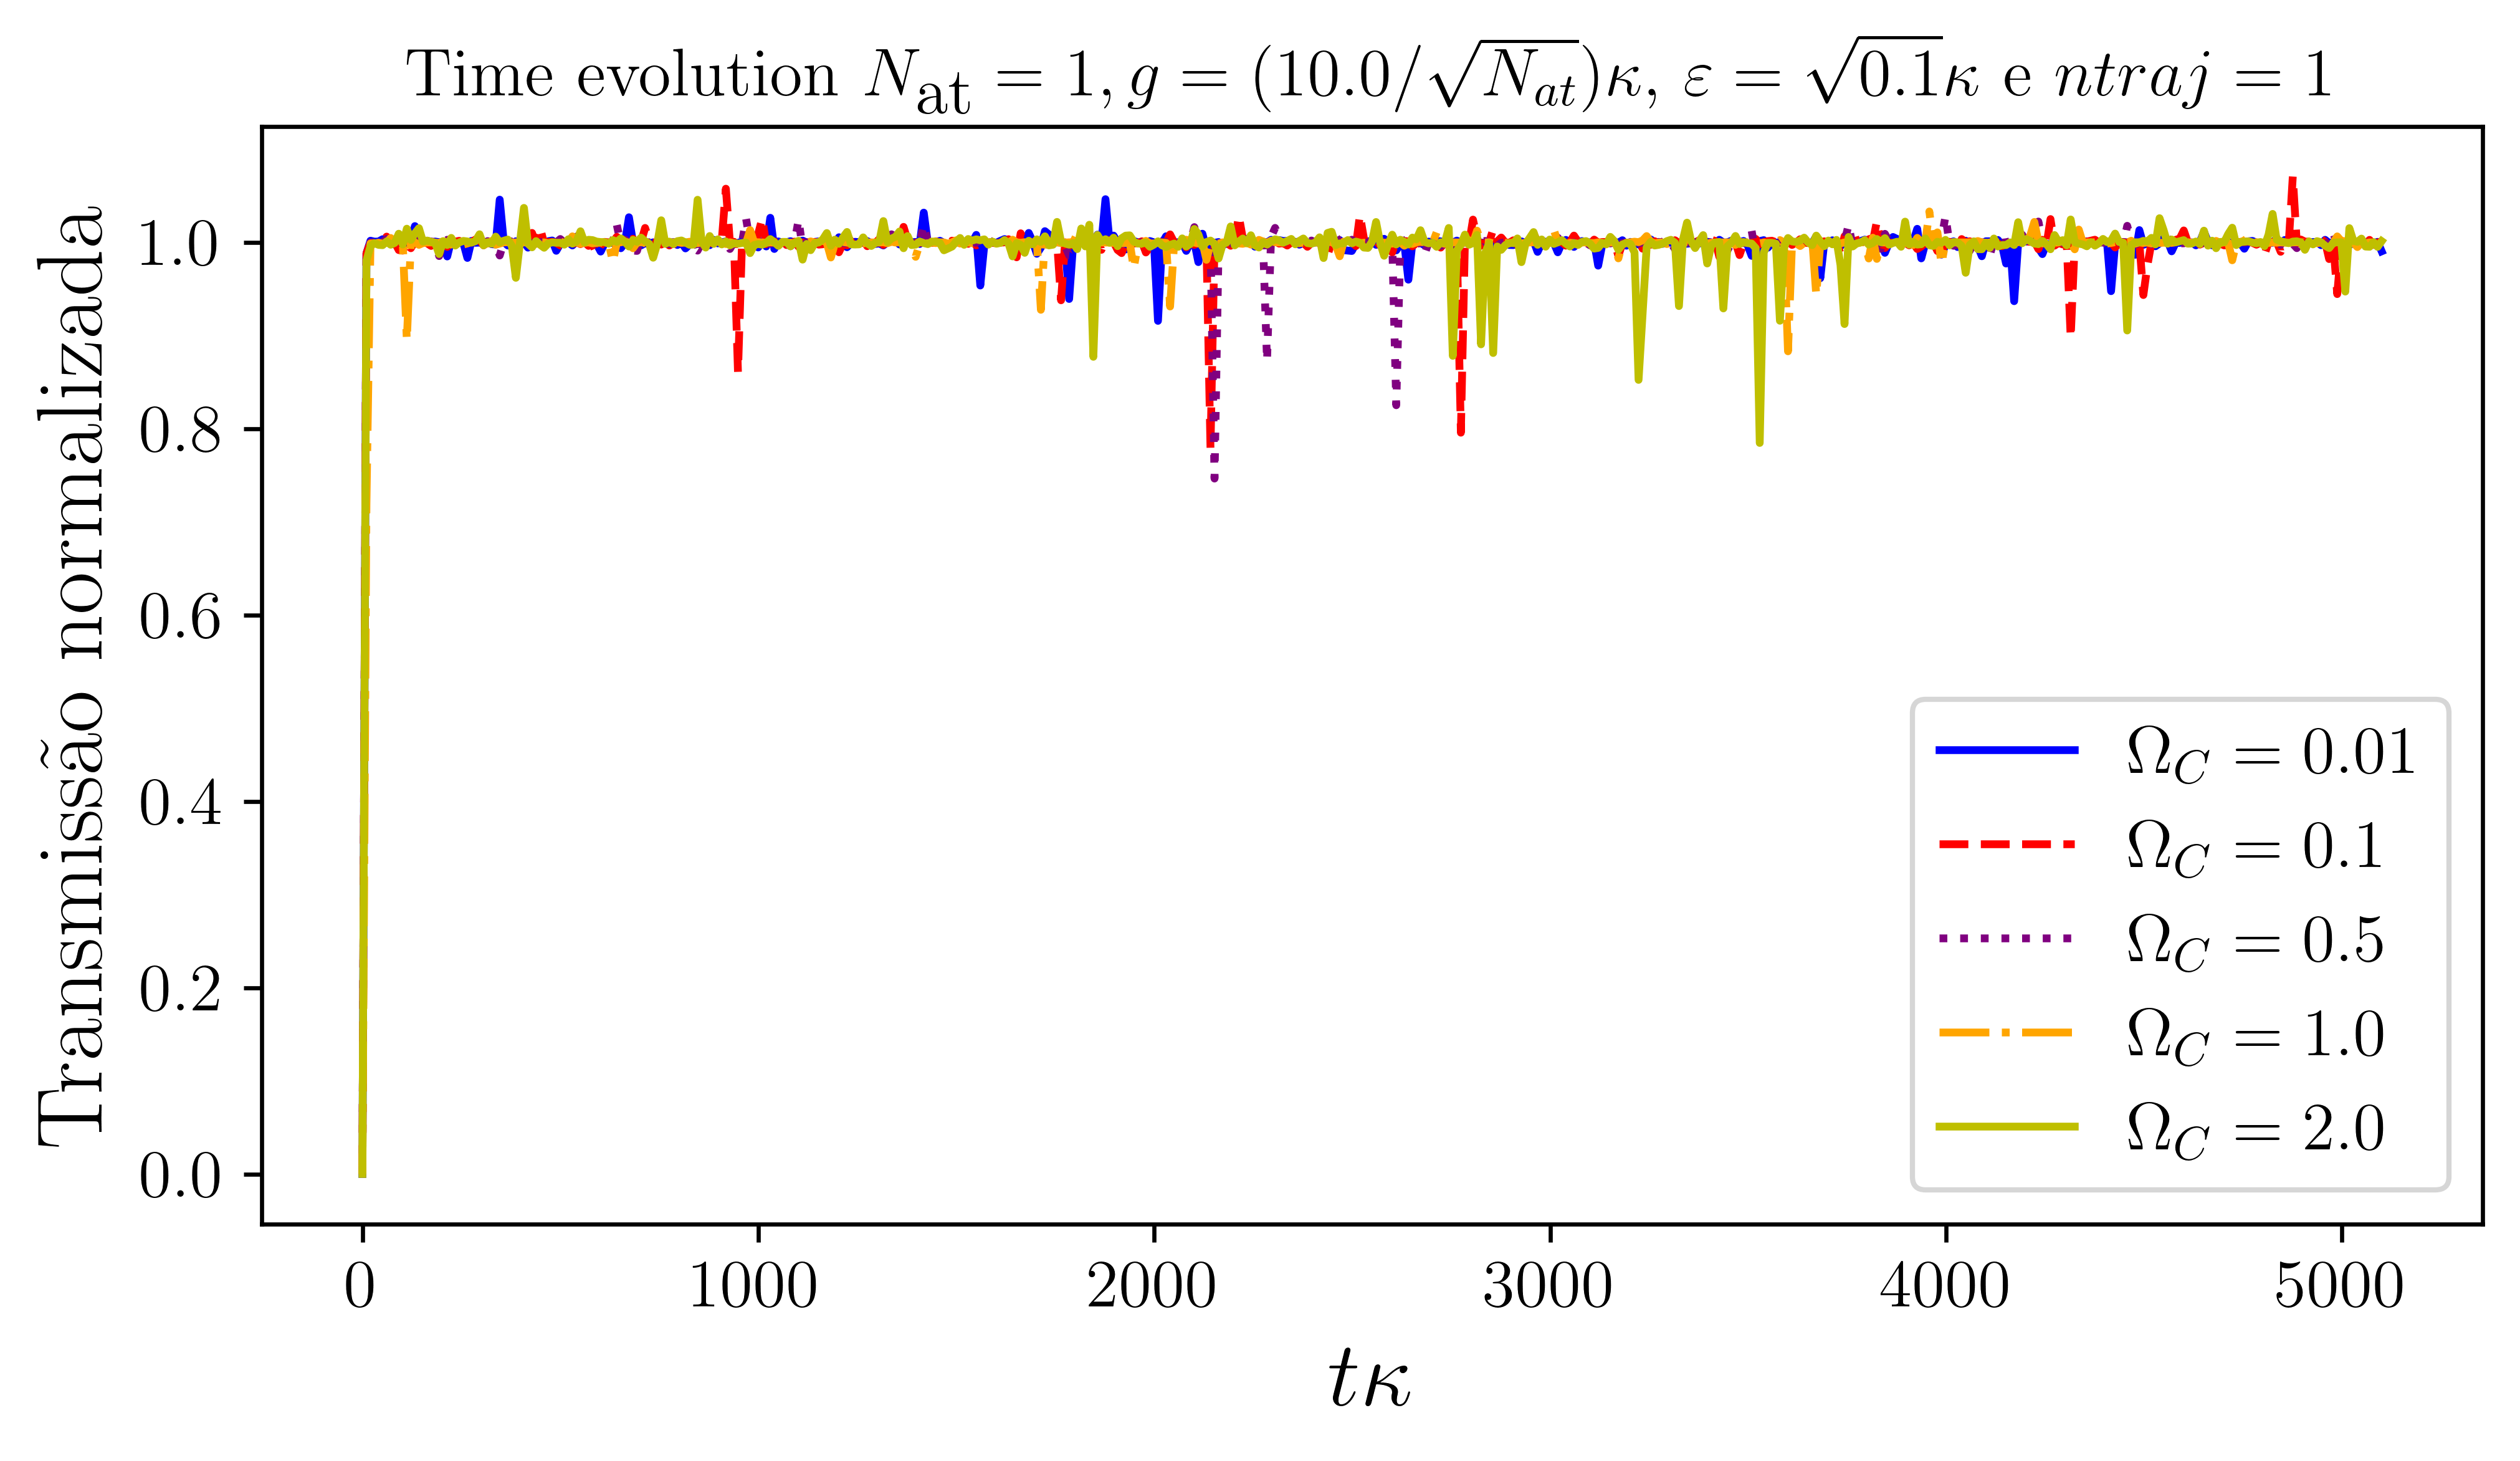

In [81]:
#test plot

fig = plt.figure(figsize=(2*3.54,1.2*3.54), dpi=600, tight_layout=True)
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(N1[:,0],N4[:,1],color='b',linestyle='-')
ax1.plot(N1[:,0],N4[:,2],color='r',linestyle='--')
ax1.plot(N1[:,0],N4[:,3],color='purple',linestyle=':')
ax1.plot(N1[:,0],N4[:,4],color='orange',linestyle='-.')
ax1.plot(N1[:,0],N4[:,5],color='y',linestyle='-')


ax1.set_xlabel(r'$t\kappa$')
ax1.set_ylabel(r'Transmissão normalizada')
ax1.legend([r'$\Omega_C=0.01$',r'$\Omega_C=0.1$',r'$\Omega_C=0.5$',r'$\Omega_C=1.0$',r'$\Omega_C=2.0$']) 
plt.title(r'Time evolution $N_{\textrm{at}}=1, g=(10.0/\sqrt{N_{at}})\kappa$, $\varepsilon=\sqrt{0.1}\kappa$ e $ntraj=1$',fontsize=13)
#ax1.set_xlim([0,5000.0])
#ax1.set_ylim([0,1.2])
#ax1.set_yticks([min(M14[:,1]),0.97,min(M16[:,1]),1.0])
plt.show() 


plt.show()
fig.savefig('timeevolution_g10_ep01.jpeg', format='jpeg', dpi=600)